# Multilayered perceptron (MLP) image classification exercises
## 0. Fashion dataset (*)


In [21]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd






(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


In [2]:
labels ={
    0 : "T-shirt/top",
    1 : "Trouser",
    2 : "Pullover",
    3 : "Dress",
    4 : "Coat",
    5 : "Sandal",
    6 : "Shirt",
    7 : "Sneaker",
    8 : "Bag",
    9 : "Ankle boot",
}

### a) Start visualizing some of the sample images

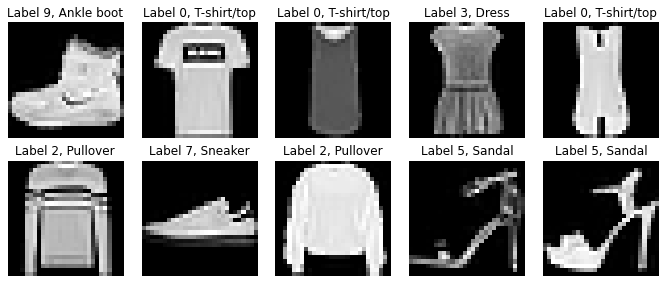

In [3]:
def display_images(data, nrows = 2, ncols = 5, figsize = (12,4)):
    fig, axes = plt.subplots(nrows, ncols, figsize = figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i,:,:], cmap = "gray", )
        ax.axis("off")
        ax.set_title(f"Label {y_train[i]}, {labels[y_train[i]]}")

    fig.subplots_adjust(wspace=0, hspace=.2, bottom=0)

display_images(x_train)


### b) Normalize the images to values between 0 and 1

In [4]:
x_train_normalized = x_train.astype("float32")/255
x_test_normalized = x_test.astype("float32")/255

###  c) Visualize same images as before, do you see any difference?

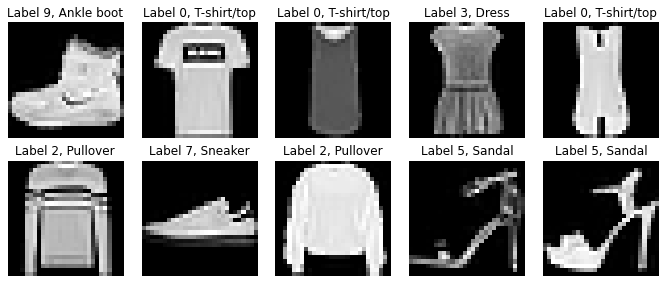

In [5]:
display_images(x_train_normalized)

Ser ingen skillnad. Rimligt!


###  d) Make histogram of a sample image before and after normalization. What do you notice?


De kommer se lika ut. Bara skalana på x-axeln kommer skilja. (Om man tar lika många bins så klart.)


###  e) Check if the dataset is balanced.

In [6]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [7]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

Full balans. Rena zen.

## 1. MLP architecture (*)
###  a) Create a network with no hidden layers, fit the model for 50 epochs. Use 10000 samples for validation.


In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
#from tensorflow.keras.optimizers import SGD

In [25]:
model = Sequential(name="MLP_model")
# flattens the input
model.add(Flatten(input_shape=(28, 28), name="Input_layer"))

model.add(Dense(10, name="Output_layer", activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",
                  metrics=["accuracy"]
                  )


model.summary()

Model: "MLP_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Flatten)       (None, 784)               0         
                                                                 
 Output_layer (Dense)        (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(x_train, y_train, validation_split=1/6, epochs=50, verbose=2)

Epoch 1/50
1563/1563 - 6s - loss: 17.2642 - accuracy: 0.7416 - val_loss: 15.7534 - val_accuracy: 0.7334 - 6s/epoch - 4ms/step
Epoch 2/50
1563/1563 - 4s - loss: 12.3119 - accuracy: 0.7873 - val_loss: 10.7363 - val_accuracy: 0.8028 - 4s/epoch - 3ms/step
Epoch 3/50
1563/1563 - 5s - loss: 11.7056 - accuracy: 0.7935 - val_loss: 10.1079 - val_accuracy: 0.8060 - 5s/epoch - 3ms/step
Epoch 4/50
1563/1563 - 4s - loss: 10.6158 - accuracy: 0.8021 - val_loss: 9.8145 - val_accuracy: 0.8105 - 4s/epoch - 2ms/step
Epoch 5/50
1563/1563 - 5s - loss: 10.1533 - accuracy: 0.8021 - val_loss: 12.2448 - val_accuracy: 0.7888 - 5s/epoch - 3ms/step
Epoch 6/50
1563/1563 - 4s - loss: 10.3195 - accuracy: 0.8052 - val_loss: 12.1926 - val_accuracy: 0.8033 - 4s/epoch - 3ms/step
Epoch 7/50
1563/1563 - 4s - loss: 10.2016 - accuracy: 0.8054 - val_loss: 10.4780 - val_accuracy: 0.7973 - 4s/epoch - 2ms/step
Epoch 8/50
1563/1563 - 3s - loss: 10.0426 - accuracy: 0.8089 - val_loss: 12.5640 - val_accuracy: 0.7808 - 3s/epoch - 2m

###  b) Plot training loss vs validation loss and accuracy against validation accuracy.


In [20]:
def plot_metrics(df_history, style="-o"):
    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    metrics = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    for ax, metric in zip(axes, metrics):
        df_history.plot(y=metric, xlabel="Epochs",
                        ylabel=metric[0],
                        title=metric[0], ax=ax, style=style)



In [27]:
history = pd.DataFrame(model.history.history)
history.index = range(len(history))
history.head()


,loss,accuracy,val_loss,val_accuracy
0,17.264231,0.74164,15.753436,0.7334
1,12.311932,0.78732,10.736258,0.8028
2,11.705580,0.79354,10.107905,0.8060
3,10.615761,0.80210,9.814454,0.8105
4,10.153304,0.80208,12.244789,0.7888


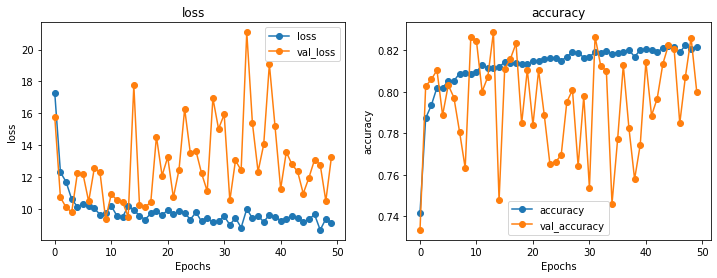

In [28]:
plot_metrics(history)

### c) Repeat a) and b) for hidden_layers  ∈{1,2,3}

### d) Add dropout layers and choose a rate of dropout, and perform a few experiments. Note that you shouldn't add dropout layers after input layer and after output layer.

###  f) Define an experiment you want to investigate and perform it.

###  g) Choose a model from your experiments.

## 2. Predict and evaluate (*)